In [19]:
from math import sqrt, ceil
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
data = pd.read_csv('../data/student-por.csv')

In [21]:
plt.style.use("dark_background")

In [22]:
Y = data[['G1', 'G2', 'G3']].sum(axis=1)
X = data.drop(['G1', 'G2', 'G3'], axis=1)
X = (X-X.min())/(X.max()-X.min())
Y = Y.apply(lambda x: 1 if x > 36 else 0)

In [23]:
random_state = 9527

pca_1d = PCA(5, random_state=random_state)
L_sk = pca_1d.fit_transform(X)
print(pca_1d.explained_variance_ratio_)
print('L_sk.shape:', L_sk.shape)
print('L_sk:', L_sk[:, :4])


[0.11397245 0.0917797  0.07526358 0.0687543  0.06261955]
L_sk.shape: (649, 5)
L_sk: [[ 0.15695805 -0.55878665 -0.78704099  0.29579253]
 [ 0.06733778 -0.76011544 -0.42695537 -0.11849852]
 [-0.04480769 -0.2574291  -0.91941322  0.45572352]
 ...
 [ 0.77179653 -0.02189488 -0.01720862  0.03977117]
 [ 0.20502902  1.05775931 -0.87245234  0.33873277]
 [ 0.61503528  1.21087866 -0.72392194 -0.1035755 ]]


In [24]:
print(Y.value_counts())

0    373
1    276
Name: count, dtype: int64


In [25]:
def knn_thing(L_sk, Y, log_data, ratio=.2, rs=42):
    curr_best_report = None
    curr_best_k = None
    best_f1 = 0
    for i in range(1, ceil(sqrt(len(L_sk)))):
        X_train, X_test, y_train, y_test = train_test_split(L_sk, Y, test_size=ratio, random_state=rs)
        # Feature scaling (optional but recommended for KNN)
        
        knn = KNeighborsClassifier(n_neighbors=i)

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            curr_best_report = classification_report(y_test, y_pred)
            curr_best_k = i
        log_data.append({'k': i, 'F1 Score': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    log_df = pd.DataFrame(log_data)
    log_df.to_csv(f'../reports/pca_then_knn_{ratio}.csv', index=False)
    print(f"Best K: {curr_best_k}")
    print(curr_best_report)

In [26]:
def plot_log(log_df, title='Performance Metrics vs. k(With PCA)'):
    plt.figure(figsize=(10, 6))
    plt.plot(log_df['k'], log_df['F1 Score'], label='F1 Score')
    plt.plot(log_df['k'], log_df['Accuracy'], label='Accuracy')
    plt.plot(log_df['k'], log_df['Precision'], label='Precision')
    plt.plot(log_df['k'], log_df['Recall'], label='Recall')

    plt.xlabel('k')
    plt.ylabel('value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Best K: 3
              precision    recall  f1-score   support

           0       0.65      0.66      0.65        70
           1       0.59      0.58      0.59        60

    accuracy                           0.62       130
   macro avg       0.62      0.62      0.62       130
weighted avg       0.62      0.62      0.62       130


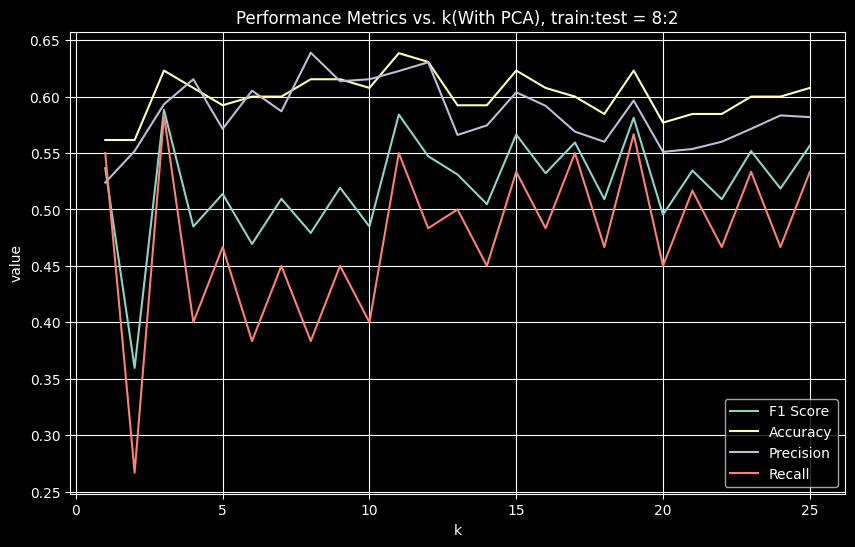

CPU times: user 965 ms, sys: 292 ms, total: 1.26 s
Wall time: 752 ms


In [27]:
%%time
## KNN with train:test = 8:2
log_data = []
knn_thing(L_sk, Y, log_data)
plot_log(pd.DataFrame(log_data), title='Performance Metrics vs. k(With PCA), train:test = 8:2')

Best K: 21
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       110
           1       0.57      0.60      0.58        85

    accuracy                           0.63       195
   macro avg       0.62      0.62      0.62       195
weighted avg       0.63      0.63      0.63       195


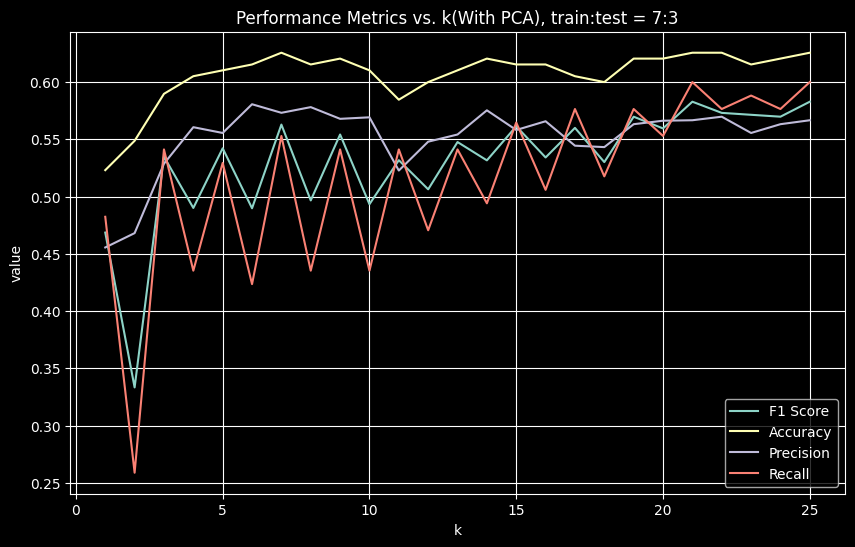

CPU times: user 1.03 s, sys: 70.1 ms, total: 1.1 s
Wall time: 1.08 s


In [28]:
%%time
## KNN with train:test = 7:3
log_data = []
knn_thing(L_sk, Y, log_data, ratio=.3)
plot_log(pd.DataFrame(log_data), title='Performance Metrics vs. k(With PCA), train:test = 7:3')